<a href="https://colab.research.google.com/github/DavidMercadoFaustino/curso_ds_awari/blob/master/atividades/Web_Scraping_Dados_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scraping Dados do IPCA
O exercício a ser desenvolvido para a presente unidade consiste em conectar-se a uma API. O Banco Central do Brasil disponibiliza dados a respeito de diversos indicadores econômicos do país. Sua tarefa será encontrar a série histórica relativa à inflação (IPCA) na plataforma de dados abertos do BC, importá-la e transformá-la em um DataFrame do Pandas.


In [ ]:
#Importações dos pacotes
import json  'para ler o conteudo da pagina do BC'
import requests 'para fazer extrair os dados'
import pandas as pd 'para analise dos dados requisitados'
import matplotlib.pyplot as plt 'plotagem de gráficos'
import numpy as np 'operações matematicas'



In [ ]:
# Paramentros
URL_IPCA_BC = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.4448/dados?formato=json'

In [ ]:
requests.get(URL_IPCA_BC) 'realização do request'

<Response [200]>

In [ ]:
json_conteudo = requests.get(URL_IPCA_BC).content 'extração do conteúdo do request'
json_conteudo

b'[{"data":"01/01/1992","valor":"26.18"},{"data":"01/02/1992","valor":"22.40"},{"data":"01/03/1992","valor":"21.25"},{"data":"01/04/1992","valor":"18.96"},{"data":"01/05/1992","valor":"25.52"},{"data":"01/06/1992","valor":"19.72"},{"data":"01/07/1992","valor":"21.79"},{"data":"01/08/1992","valor":"20.31"},{"data":"01/09/1992","valor":"25.02"},{"data":"01/10/1992","valor":"24.41"},{"data":"01/11/1992","valor":"21.73"},{"data":"01/12/1992","valor":"23.51"},{"data":"01/01/1993","valor":"31.38"},{"data":"01/02/1993","valor":"24.79"},{"data":"01/03/1993","valor":"27.84"},{"data":"01/04/1993","valor":"25.63"},{"data":"01/05/1993","valor":"27.81"},{"data":"01/06/1993","valor":"29.20"},{"data":"01/07/1993","valor":"28.05"},{"data":"01/08/1993","valor":"32.91"},{"data":"01/09/1993","valor":"35.81"},{"data":"01/10/1993","valor":"32.21"},{"data":"01/11/1993","valor":"34.40"},{"data":"01/12/1993","valor":"35.79"},{"data":"01/01/1994","valor":"44.63"},{"data":"01/02/1994","valor":"42.46"},{"data":"

In [ ]:
json_data = json.loads(json_conteudo) 'colocado o conteúdo do request em uma variável de tipo lista'
json_data[:5]

[{'data': '01/01/1992', 'valor': '26.18'},
 {'data': '01/02/1992', 'valor': '22.40'},
 {'data': '01/03/1992', 'valor': '21.25'},
 {'data': '01/04/1992', 'valor': '18.96'},
 {'data': '01/05/1992', 'valor': '25.52'}]

In [ ]:
# Manipulando os dados
df = pd.json_normalize(json_data) 'transoformando um lista em um data frame'
df[:5]

,data,valor
0,01/01/1992,26.18
1,01/02/1992,22.40
2,01/03/1992,21.25
3,01/04/1992,18.96
4,01/05/1992,25.52


In [ ]:
df.dtypes 'verificando o tipo dos dados'

data     object
valor    object
dtype: object

In [ ]:
df['data'] =  pd.to_datetime(df['data'], format='%d/%m/%Y') 'Normalizando a coluna data em formato de datetime'

In [ ]:
df['ano'] = df['data'].dt.year 'criando as colunas de mês e ano para analises'
df['mes'] = df['data'].dt.month

In [ ]:
df[:5]

,data,valor,ano,mes
0,1992-01-01,26.18,1992,1
1,1992-02-01,22.40,1992,2
2,1992-03-01,21.25,1992,3
3,1992-04-01,18.96,1992,4
4,1992-05-01,25.52,1992,5


In [ ]:
df['valor'] =  pd.to_numeric(df['valor']) "normalizando a coluna valor em formato float"
df.dtypes

data     datetime64[ns]
valor           float64
ano               int64
mes               int64
dtype: object

In [ ]:
medias = df['valor'].groupby(df['ano']) "agrupando pelas médias por ano"
medias.mean()

ano
1992    22.566667
1993    30.485000
1994    24.089167
1995     2.570000
1996     1.085833
1997     0.359167
1998     0.123333
1999     0.135000
2000     0.305833
2001     0.465000
2002     0.603333
2003     0.539167
2004     0.555000
2005     0.515833
2006     0.328333
2007     0.540833
2008     0.573333
2009     0.450000
2010     0.588333
2011     0.690000
2012     0.679167
2013     0.677500
2014     0.600000
2015     0.695833
2016     0.515000
2017     0.243333
2018     0.322500
2019     0.276667
2020     0.238333
Name: valor, dtype: float64

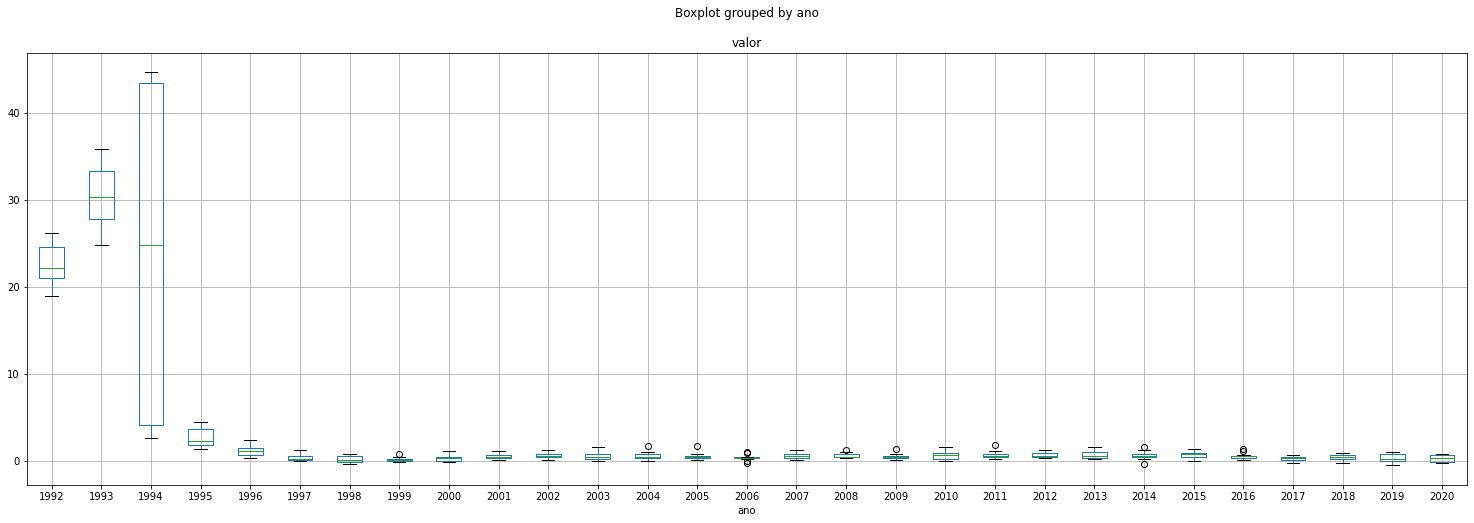

In [ ]:
# Vizualização dos Dados
df.boxplot(column='valor',by='ano',figsize=(25, 8),) 
plt.show()

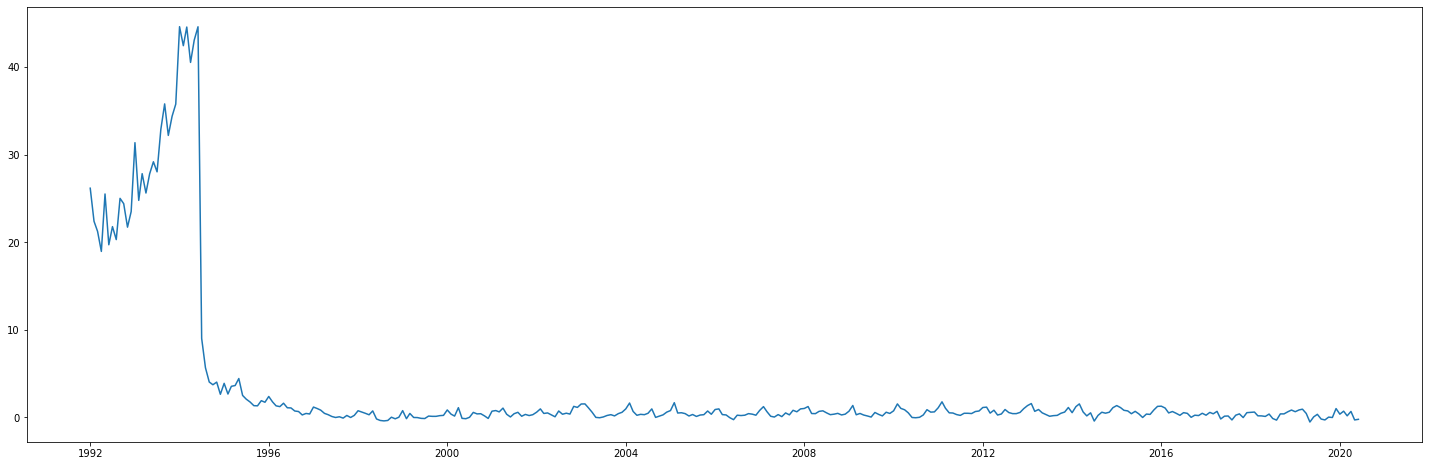

In [ ]:
datas = df['data']
ipca = df['valor']
plt.figure(figsize=(25, 8))
plt.plot(datas, ipca,)

Por conta da difuldade de vizualização dos dados dos ultimos 25 anos foi feito um recorte excluindo os anos de 1992 a 1994.

In [ ]:
novo_df = df.loc[df['ano']>=1995]

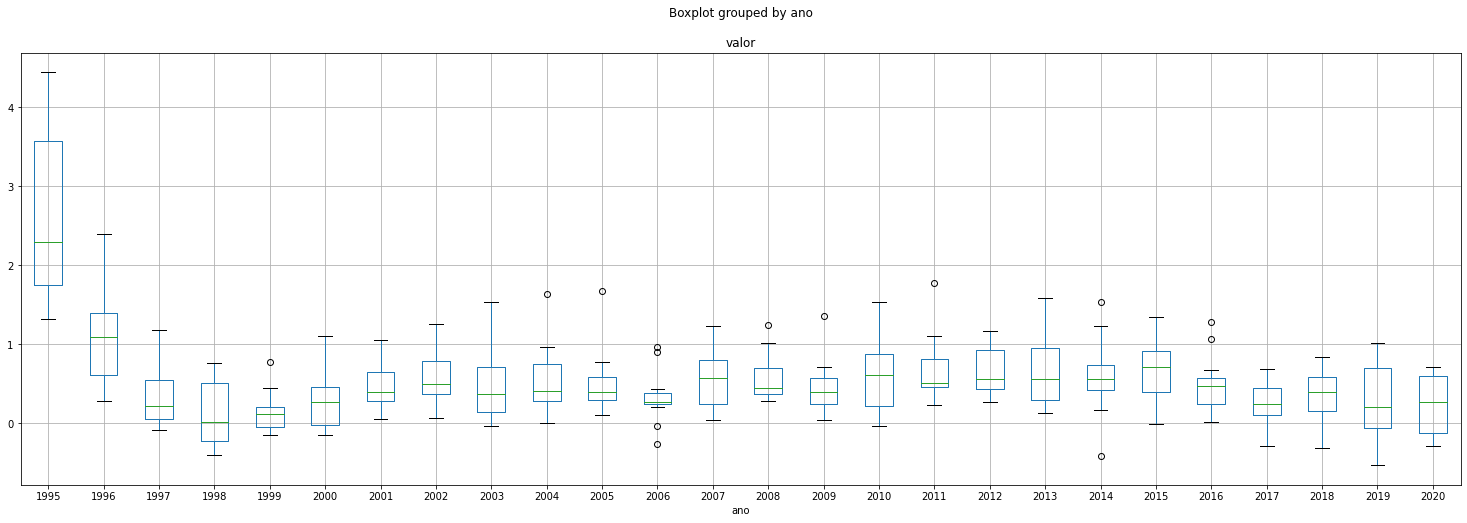

In [ ]:
novo_df.boxplot(column='valor',by='ano',figsize=(25, 8),)
plt.show()

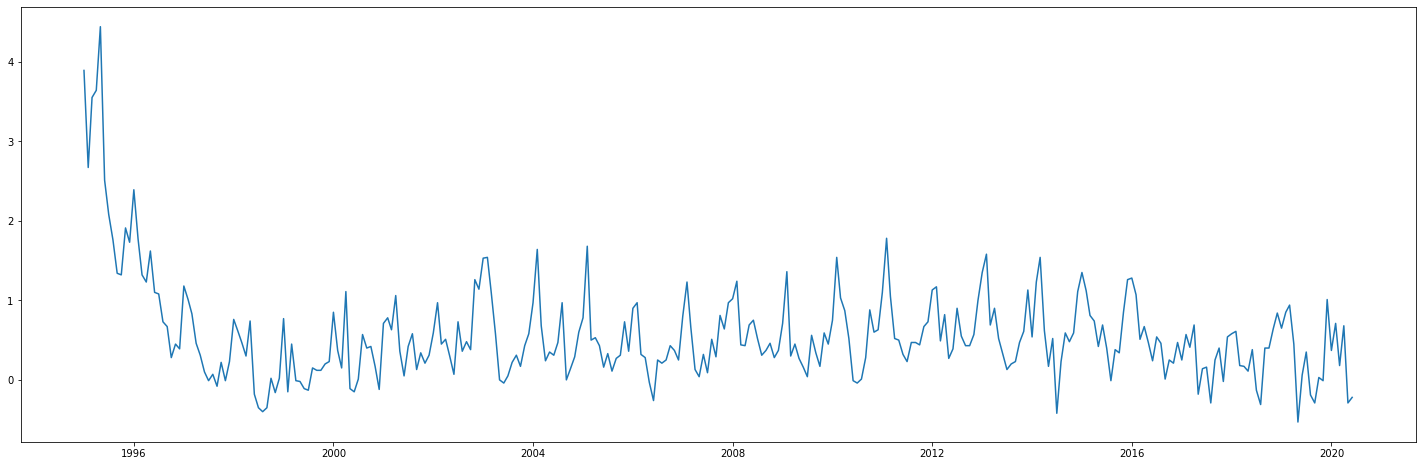

In [ ]:
ipca2 = novo_df['valor']
datas2 = novo_df['data']
plt.figure(figsize=(25, 8))
plt.plot(datas2,ipca2,)
plt.show()